In [1]:
import torch
import os
import numpy as np
from options.test_options import TestOptions
from data import create_dataset
from models import create_model
from util.visualizer import save_images
from util import html
from util.util import tensor2im, save_image
from collections import OrderedDict

print(torch.__version__)

0.4.1


In [2]:
opt = TestOptions().parse()

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/young2old          
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                             	[default: 0]
 

# change the argparser's params and other params

In [3]:
opt.num_threads = 0
opt.batch_size = 1
opt.serial_batches = True
opt.no_flip = True    
opt.display_id = -1 
opt.num_test = 10

opt.name = 'young2old_cyclegan'
opt.model = 'test'
opt.model_suffix = ''

model_name = ['G' + opt.model_suffix]
visual_names = ['real', 'fake']

In [4]:
dataset = create_dataset(opt)
model = create_model(opt)
# for i, data in enumerate(dataset):
#     if i > 2:
#         break
#     for key in data:
#         print(key)

dataset [SingleDataset] was created
initialize network with normal
model [TestModel] was created


In [5]:
# web_dir = os.path.join(opt.results_dir, opt.name, '{}_{}'.format(opt.phase, opt.epoch))
# if opt.load_iter > 0:  # load_iter is 0 by default
#     web_dir = '{:s}_iter{:d}'.format(web_dir, opt.load_iter)
# print('creating web directory', web_dir)

In [6]:
load_suffix = 'iter_%d' % opt.load_iter if opt.load_iter > 0 else opt.epoch
load_dir = os.path.join(opt.checkpoints_dir, opt.name)
# model.load_networks(load_suffix)
for name in model_name:
    if isinstance(name, str):
        load_filename = '%s_net_%s.pth' % (opt.epoch, name)
        load_path = os.path.join(load_dir, load_filename)
        net = getattr(model, 'net' + name)
        if isinstance(net, torch.nn.DataParallel):
            net = net.module
        print("="*100)
        print('loading the model from %s' % load_path)
        state_dict = torch.load(load_path, map_location=model.device)
        for key in list(state_dict.keys()):
            print("-"*100)
            print(key)

        net.load_state_dict(state_dict) #load_state_dict()函数中将strict参数设置为 False 来忽略非匹配键的函数
# model.setup(opt) 

loading the model from ./checkpoints/young2old_cyclegan/latest_net_G.pth
----------------------------------------------------------------------------------------------------
model.1.weight
----------------------------------------------------------------------------------------------------
model.1.bias
----------------------------------------------------------------------------------------------------
model.4.weight
----------------------------------------------------------------------------------------------------
model.4.bias
----------------------------------------------------------------------------------------------------
model.7.weight
----------------------------------------------------------------------------------------------------
model.7.bias
----------------------------------------------------------------------------------------------------
model.10.conv_block.1.weight
----------------------------------------------------------------------------------------------------
model.

In [7]:
# def get_current_visuals():
#     visual_ret = OrderedDict()
#     for name in visual_names:
#         if isinstance(name, str):
#             visual_ret[name] = get

In [8]:
model.eval()
visual_ret = OrderedDict()
real_imgs = []
fake_imgs = []

for i,data in enumerate(dataset):
    if i > opt.num_test:
        break
#     for key in data:
#         print(key)
#     real = data['A'].to(model.device)
    real = data['A'].to(model.device)
    image_path = data['A_paths']
    net.to(model.device)
    
    # If "with torch.no_grad()" is not used here, there will be a "cuda out of memory" situation
    with torch.no_grad():
        fake = model.netG(real)
    
    real_numpy = tensor2im(real)
    fake_numpy = tensor2im(fake)
#     print(real_numpy.shape)
#     print(fake_numpy.shape)
    real_imgs.append(real_numpy)
    fake_imgs.append(fake_numpy)

In [9]:
import matplotlib.pyplot as plt

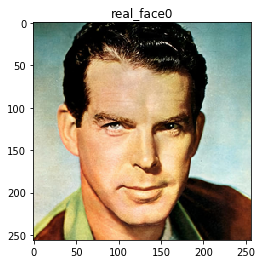

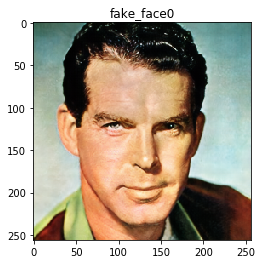

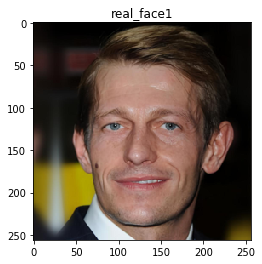

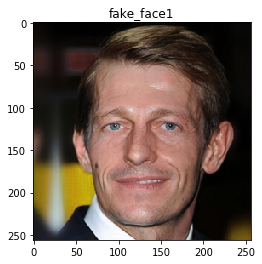

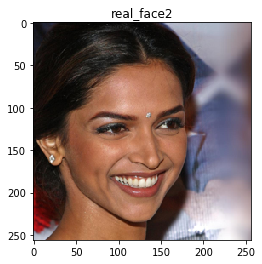

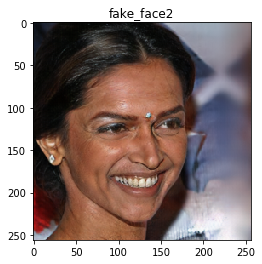

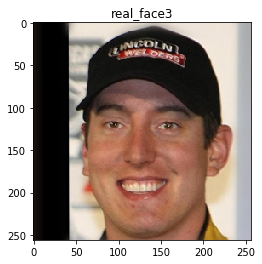

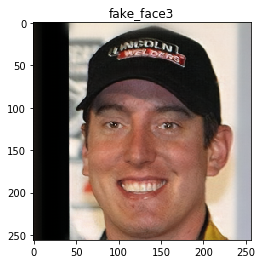

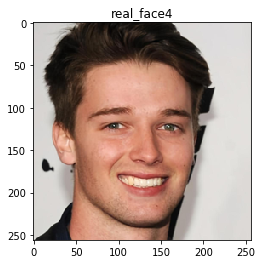

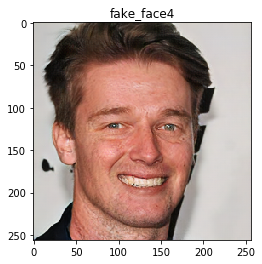

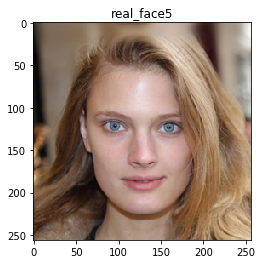

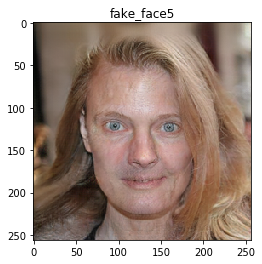

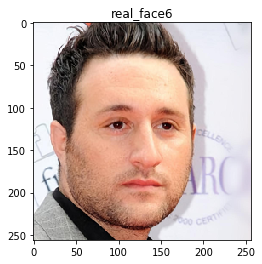

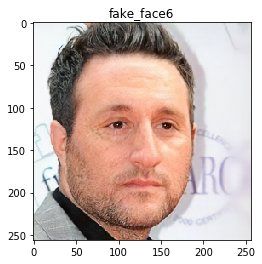

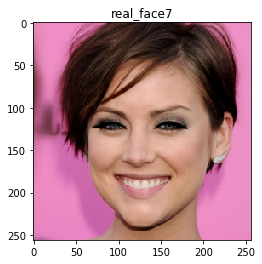

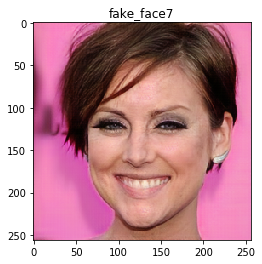

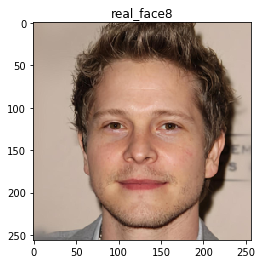

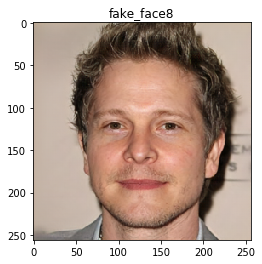

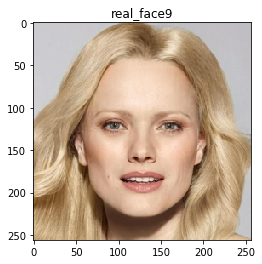

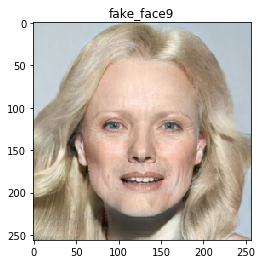

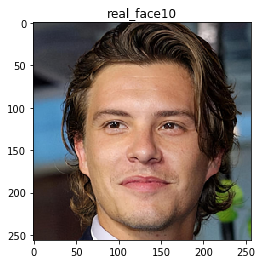

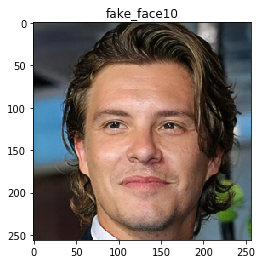

In [10]:
# show the real and fake images
for i, img in enumerate(real_imgs):
    plt.imshow(real_imgs[i])
    plt.title("real_face" + str(i))
    plt.show()
    plt.title("fake_face"+ str(i))
    plt.imshow(fake_imgs[i])
    plt.show()

In [11]:
from PIL import Image

In [12]:
# save the real and fake images
save_imgs_path = '/home/maxingpei/GAN/CycleGAN/code/pytorch-CycleGAN-and-pix2pix/imgs'

for i, img in enumerate(real_imgs):
    Real = Image.fromarray(real_imgs[i], 'RGB')
    Fake = Image.fromarray(fake_imgs[i], 'RGB')

    Real.save(save_imgs_path + '/' + 'real' + str(i) + '.png')
    Fake.save(save_imgs_path +  '/' + 'fake' + str(i) + '.png')